In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import Adam         # 알고리즘 담당
import sklearn
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [3]:
import pandas as pd
df = pd.read_csv("gpascore.csv")
df

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [4]:
df = df.dropna()
df.shape

(425, 4)

In [5]:
cols = df.keys()
cols

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [7]:
df.shape

(425, 4)

In [8]:
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('admit', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['admit']    # 1차원

In [9]:
x_data.shape

(425, 3)

In [10]:
y_data.shape

(425,)

In [11]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [12]:
norm_x_data.shape

(425, 3)

norm_x_data=sklearn.utils.shuffle(norm_x_data)

In [13]:
norm_x_data

array([[-1.80429683, -0.44477549,  0.54842931],
       [ 0.55283702,  0.71817232,  0.54842931],
       [ 1.73140395,  1.55246097, -1.56091419],
       ...,
       [-1.21501337, -0.34364959,  1.60310106],
       [ 1.39467054,  0.94570559, -0.50624244],
       [ 0.97375378,  1.09739443,  0.54842931]])

In [58]:
model = Sequential()    # model 생성

model.add(Flatten(input_shape=(3,)))     # 모델 box에 input layer 추가
model.add(Dense(256, activation="sigmoid")) 
model.add(Dense(128, activation="sigmoid")) 
model.add(Dense(64, activation="sigmoid")) 
model.add(Dense(1, activation="sigmoid")) # 모델 box에 output layer 추가
                                                  # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.

In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3)                 0         
                                                                 
 dense_36 (Dense)            (None, 256)               1024      
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 42241 (165.00 KB)
Trainable params: 42241 (165.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# model이 어떻게 도작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
             )

In [61]:
hist = model.fit(norm_x_data,
          y_data,
          epochs=400,
          verbose=1,
          validation_split=0.3)

Epoch 1/400
10/10 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.4882 - val_loss: 0.6922 - val_accuracy: 0.5078
Epoch 2/400
10/10 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5354 - val_loss: 0.6924 - val_accuracy: 0.5078
Epoch 3/400
10/10 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5354 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 4/400
10/10 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5354 - val_loss: 0.6909 - val_accuracy: 0.5078
Epoch 5/400
10/10 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.5354 - val_loss: 0.6910 - val_accuracy: 0.5078
Epoch 6/400
10/10 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.5354 - val_loss: 0.6911 - val_accuracy: 0.5078
Epoch 7/400
10/10 [==============================] - 0s 8ms/step - loss: 0.6868 - accuracy: 0.5354 - val_loss: 0.6923 - val_accuracy: 0.5078
Epoch 8/400


Epoch 59/400
10/10 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.7542 - val_loss: 0.6167 - val_accuracy: 0.7656
Epoch 60/400
10/10 [==============================] - 0s 5ms/step - loss: 0.6101 - accuracy: 0.7441 - val_loss: 0.6130 - val_accuracy: 0.7734
Epoch 61/400
10/10 [==============================] - 0s 7ms/step - loss: 0.6074 - accuracy: 0.7576 - val_loss: 0.6097 - val_accuracy: 0.7656
Epoch 62/400
10/10 [==============================] - 0s 7ms/step - loss: 0.6032 - accuracy: 0.7643 - val_loss: 0.6059 - val_accuracy: 0.7578
Epoch 63/400
10/10 [==============================] - 0s 7ms/step - loss: 0.6003 - accuracy: 0.7912 - val_loss: 0.6020 - val_accuracy: 0.7891
Epoch 64/400
10/10 [==============================] - 0s 6ms/step - loss: 0.5969 - accuracy: 0.7778 - val_loss: 0.5999 - val_accuracy: 0.7656
Epoch 65/400
10/10 [==============================] - 0s 5ms/step - loss: 0.5941 - accuracy: 0.7744 - val_loss: 0.5960 - val_accuracy: 0.7734
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.4789 - accuracy: 0.8013 - val_loss: 0.4793 - val_accuracy: 0.8203
Epoch 117/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.8081 - val_loss: 0.4795 - val_accuracy: 0.8125
Epoch 118/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.8081 - val_loss: 0.4782 - val_accuracy: 0.8125
Epoch 119/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.8047 - val_loss: 0.4773 - val_accuracy: 0.8203
Epoch 120/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.8081 - val_loss: 0.4769 - val_accuracy: 0.8203
Epoch 121/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4759 - accuracy: 0.8047 - val_loss: 0.4761 - val_accuracy: 0.8281
Epoch 122/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.8047 - val_loss: 0.4759 - val_accuracy: 0.8125
Epoch 123/400

10/10 [==============================] - 0s 6ms/step - loss: 0.4669 - accuracy: 0.8047 - val_loss: 0.4651 - val_accuracy: 0.8125
Epoch 174/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8047 - val_loss: 0.4651 - val_accuracy: 0.8125
Epoch 175/400
10/10 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.8047 - val_loss: 0.4650 - val_accuracy: 0.8125
Epoch 176/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4660 - accuracy: 0.8047 - val_loss: 0.4648 - val_accuracy: 0.8125
Epoch 177/400
10/10 [==============================] - 0s 5ms/step - loss: 0.4665 - accuracy: 0.8013 - val_loss: 0.4646 - val_accuracy: 0.8203
Epoch 178/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4662 - accuracy: 0.8013 - val_loss: 0.4648 - val_accuracy: 0.8125
Epoch 179/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8081 - val_loss: 0.4657 - val_accuracy: 0.8203
Epoch 180/400

10/10 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.8013 - val_loss: 0.4632 - val_accuracy: 0.8203
Epoch 231/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8013 - val_loss: 0.4634 - val_accuracy: 0.8203
Epoch 232/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8013 - val_loss: 0.4636 - val_accuracy: 0.8203
Epoch 233/400
10/10 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8013 - val_loss: 0.4626 - val_accuracy: 0.8125
Epoch 234/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.8081 - val_loss: 0.4625 - val_accuracy: 0.8203
Epoch 235/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8081 - val_loss: 0.4626 - val_accuracy: 0.8125
Epoch 236/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8013 - val_loss: 0.4633 - val_accuracy: 0.8203
Epoch 237/400

10/10 [==============================] - 0s 7ms/step - loss: 0.4639 - accuracy: 0.8047 - val_loss: 0.4615 - val_accuracy: 0.8281
Epoch 288/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.8081 - val_loss: 0.4616 - val_accuracy: 0.8203
Epoch 289/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4640 - accuracy: 0.8047 - val_loss: 0.4617 - val_accuracy: 0.8203
Epoch 290/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8013 - val_loss: 0.4621 - val_accuracy: 0.8203
Epoch 291/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4638 - accuracy: 0.8047 - val_loss: 0.4617 - val_accuracy: 0.8203
Epoch 292/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4641 - accuracy: 0.8114 - val_loss: 0.4616 - val_accuracy: 0.8281
Epoch 293/400
10/10 [==============================] - 0s 7ms/step - loss: 0.4643 - accuracy: 0.8114 - val_loss: 0.4617 - val_accuracy: 0.8203
Epoch 294/400

10/10 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.8047 - val_loss: 0.4612 - val_accuracy: 0.8203
Epoch 345/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.8081 - val_loss: 0.4611 - val_accuracy: 0.8203
Epoch 346/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8114 - val_loss: 0.4609 - val_accuracy: 0.8203
Epoch 347/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.8081 - val_loss: 0.4611 - val_accuracy: 0.8203
Epoch 348/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.8047 - val_loss: 0.4613 - val_accuracy: 0.8203
Epoch 349/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4643 - accuracy: 0.8013 - val_loss: 0.4625 - val_accuracy: 0.8125
Epoch 350/400
10/10 [==============================] - 0s 6ms/step - loss: 0.4639 - accuracy: 0.8013 - val_loss: 0.4615 - val_accuracy: 0.8203
Epoch 351/400

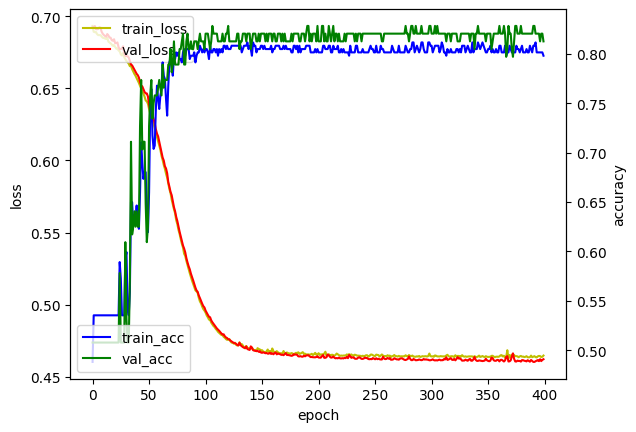

In [62]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")